In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# labelencoderテスト
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
list(le.classes_)
le.transform(["tokyo","amsterdam","paris"])

array([2, 0, 1], dtype=int64)

In [2]:
data = pd.read_csv('train (2).csv')
# print(data.corr())
print(data.columns)

Index(['index', 'Order', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')


In [3]:
print(data.isnull().sum())

index             0
Order             0
MS SubClass       0
MS Zoning         0
Lot Area          0
Lot Shape         0
Land Contour      0
Lot Config        0
Neighborhood      0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Foundation        0
BsmtFin SF 1      0
Bsmt Unf SF       0
Total Bsmt SF     0
Heating QC        0
Central Air       0
Electrical        0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Fireplaces        0
Garage Cars       0
Garage Area       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
dtype: int64


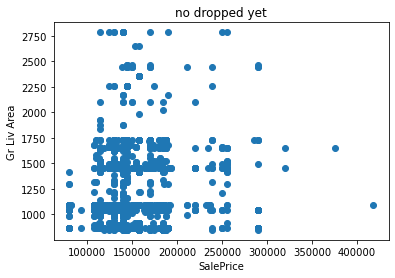

(3000, 47)


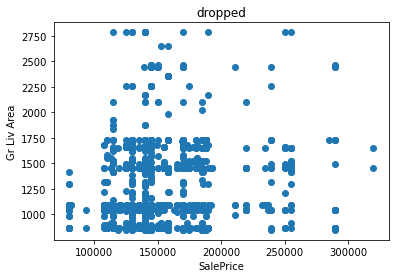

(2998, 47)


In [4]:
# SALE PRICEとGR LIV AREAの散布図を作成
plt.scatter(data['SalePrice'],data['Gr Liv Area'])
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area')
plt.title(label='no dropped yet')
plt.show()
print(data.shape)

data_dropped = data[(((data['SalePrice'] <= 350000)) | (data['Gr Liv Area'] >= 1750))]

plt.scatter(data_dropped['SalePrice'],data_dropped['Gr Liv Area'])
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area')
plt.title(label='dropped')
plt.show()
print(data_dropped.shape)

In [5]:
select_columns = ['Overall Qual','Overall Cond','Year Built','Gr Liv Area','Bsmt Full Bath','Full Bath','Half Bath','Fireplaces','Garage Cars','Garage Area']

In [6]:
# テストデータ作成
train_X,test_X,train_y,test_y = train_test_split(data[select_columns],data['SalePrice'])

In [7]:
# モデル1
model1 = LinearRegression()
model1.fit(train_X,train_y)
model1_pred_y = model1.predict(train_X)
model1_pred_test_y = model1.predict(test_X)
RMSE1 = np.sqrt(mean_squared_error(model1_pred_y,train_y))
RMSE2 = np.sqrt(mean_squared_error(model1_pred_test_y,test_y))
print(RMSE1,RMSE2)

29345.16215599788 27777.88196348571


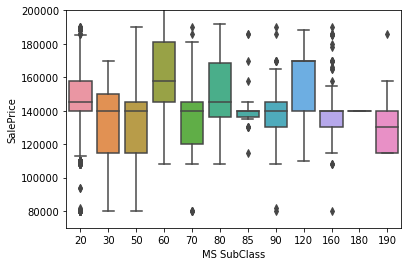

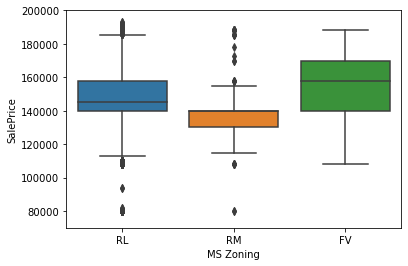

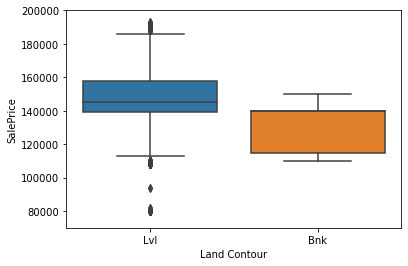

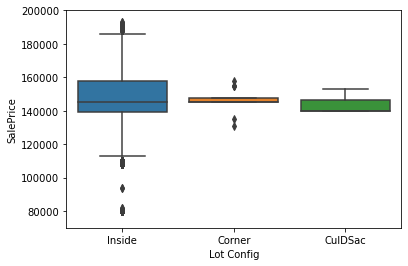

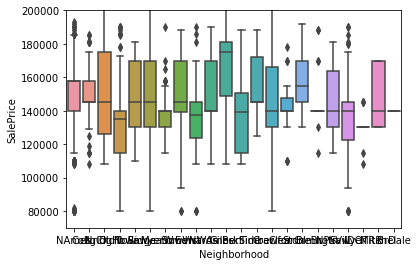

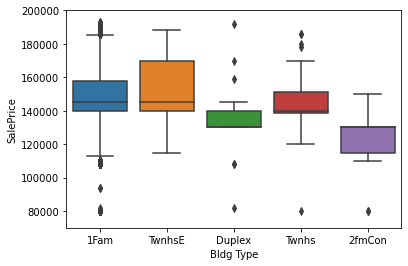

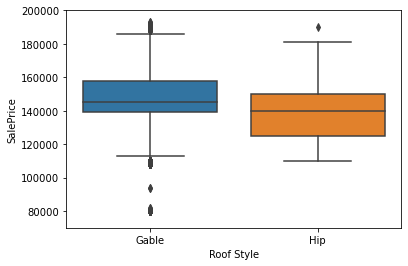

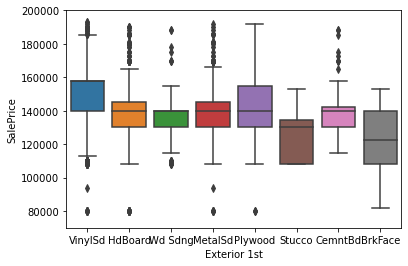

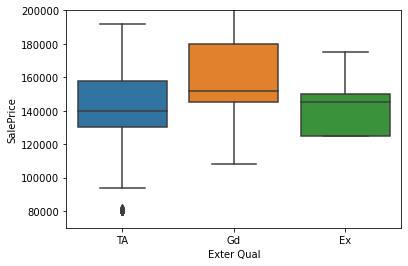

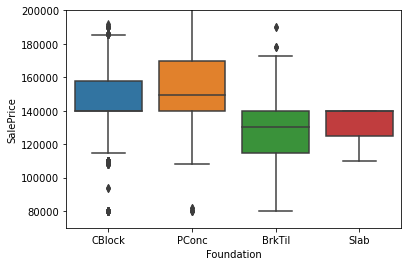

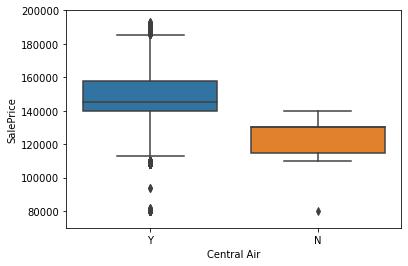

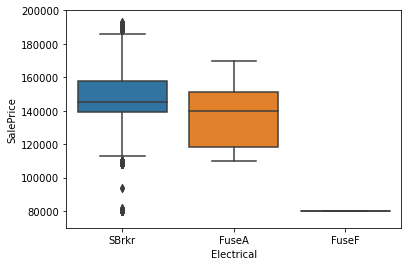

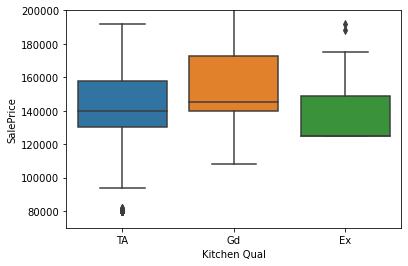

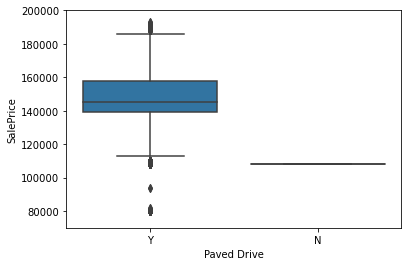

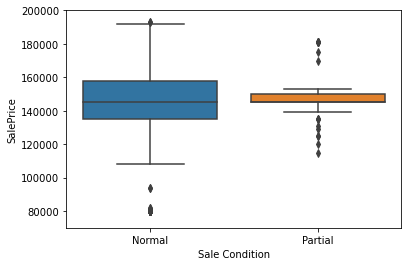

In [8]:
# ダミー化変数作成
def graph(colum_name):
    sns.boxplot(data=data,x=colum_name,y='SalePrice')
    plt.ylim(70000,200000)
    plt.show()
# 相関のある変数    
nominal_columns = ['MS SubClass','MS Zoning','Land Contour','Lot Config','Neighborhood','Bldg Type','Roof Style','Exterior 1st','Exter Qual','Foundation','Central Air','Electrical','Kitchen Qual','Paved Drive','Sale Condition']
for column in nominal_columns:
    graph(column)

In [9]:
data_dummy = pd.get_dummies(data[select_columns + nominal_columns], columns=nominal_columns, drop_first=True)
data_dummy.columns

Index(['Overall Qual', 'Overall Cond', 'Year Built', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'MS SubClass_30', 'MS SubClass_50', 'MS SubClass_60',
       'MS SubClass_70', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90',
       'MS SubClass_120', 'MS SubClass_160', 'MS SubClass_180',
       'MS SubClass_190', 'MS Zoning_RL', 'MS Zoning_RM', 'Land Contour_Lvl',
       'Lot Config_CulDSac', 'Lot Config_Inside', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neigh

In [10]:
# ダミー変数加工
train_X_dummy,test_X_dummy,train_y_dummy,test_y_dummy = train_test_split(data_dummy,data['SalePrice'])
model2 = LinearRegression()
model2.fit(train_X_dummy,train_y_dummy)
model2_pred_y = model2.predict(train_X_dummy)
model2_pred_test_y = model2.predict(test_X_dummy)
RMSE2_1 = np.sqrt(mean_squared_error(model2_pred_y,train_y_dummy))
RMSE2_2 = np.sqrt(mean_squared_error(model2_pred_test_y,test_y_dummy))
print(RMSE2_1,RMSE2_2)

27988.486968918045 28048.03967493792


In [11]:
# 外れ値除去
data_out = pd.get_dummies(data_dropped[select_columns + nominal_columns], columns=nominal_columns, drop_first=True)
train_X_out,test_X_out,train_y_out,test_y_out = train_test_split(data_out,data_dropped['SalePrice'])
model3 = LinearRegression()
model3.fit(train_X_out,train_y_out)
model3_pred_y = model3.predict(train_X_out)
model3_pred_test_y = model2.predict(test_X_out)
RMSE3_1 = np.sqrt(mean_squared_error(model3_pred_y,train_y_out))
RMSE3_2 = np.sqrt(mean_squared_error(model3_pred_test_y,test_y_out))
print(RMSE3_1,RMSE3_2)

26224.12626449674 29569.455426347628


In [21]:
# 評価用データ
data_test = pd.read_csv('test (3).csv')
data_t_dummy = pd.get_dummies(data_test[select_columns + nominal_columns], columns=nominal_columns, drop_first=True)
# print(data_t_dummy.shape)
# print(data_t_dummy.columns)
print(type(data_test['index']))
print(type(pd.Series(model3.predict(data_t_dummy))))

model3_pred_test_y = pd.concat([data_test['index'],pd.Series(model3.predict(data_t_dummy))],axis=1)
# print(model3_pred_test_y)
# csvに出力
model3_pred_test_y.to_csv('result_2021_01_04.csv',header=False)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
